<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1128%EC%9B%94%EA%B3%BC%EC%A0%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C(319~341).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06 규제 선형 모델 

## 1. 규제 선형 모델의 개요

1. 학습 데이터의 잔차오류값(실제값-예측값)을 최소로 하는 RSS 최소화 방법
2. 과적합을 방지하기 위해 회귀계수값이 커지지 않도록 하는 방법    
  -> 1, 2이 균형을 이루는 방법     
  => 비용함수 = RSS(W) + alpha|W|  
  => 비용함수 목표 = min[ RSS(W) + alpha|W| ], W 찾기     


* alpha : 학습데이터 적합정도와 회귀계수값의 크기 제어를 수행하는 튜닝 파라미터
* alpha값을 작게하면, 비용함수 = RSS(W) : 기존과 동일, 학습데이터적합을 개선할수 있음. 
* alpha값을 크게하면, 비용함수 = RSS(W)+alpha|W| : W을 작게해야하고, 과적합을 개선할 수 있다. 
  * 비용함수에 alpha값으로 페널티를 부여해 회귀계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 "규제(Regulation)"이라고 부름.

  * 규제는 크게 L1, L2 으로 구분된다. 
  * 라쏘회귀 : L1규제를 적용한 회귀
  * 릿지회귀 : L2규제를 적용한 회귀

## 2. 릿지 회귀

* 릿지회귀의 주요생성 파라미터 alpha는 L2 규제계수에 해당함.

In [2]:
# 보스턴 데이터 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
%matplotlib inline 

# 데이터셋 로드
boston = load_boston()

# 보스턴 데이터셋 DF변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# 보스턴 데이터셋의 target 배열을 price 칼럼으로 추가
bostonDF['PRICE']=boston.target
bostonDF.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import cross_val_score

## alpha=10 으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10) #릿지회귀 객체생성
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5) #음수값
rmse_scores = np.sqrt(-1*neg_mse_scores) #양수값으로 바꿔준다.
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE: 5.518


* 릿지의 5개 폴드 세트의 평균 RMSE가 5.518
* 규제가 없는 회귀의 RMSE 평균보다 더 낮아서, 더 뛰어난 예측성능을 보여줌.

### 이제 릿지의 alpha값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀계수값 변화를 살펴보자.

In [4]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas : 
  ridge = Ridge(alpha=alpha)

  # cross_val_score을 이용해서 5폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0}일때 5 folds 의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))
  

alpha 0일때 5 folds 의 평균 RMSE: 5.829
alpha 0.1일때 5 folds 의 평균 RMSE: 5.788
alpha 1일때 5 folds 의 평균 RMSE: 5.653
alpha 10일때 5 folds 의 평균 RMSE: 5.518
alpha 100일때 5 folds 의 평균 RMSE: 5.330


* alpha가 100일때 평균 RMSE가 가장 낮아 좋다. 
* alpha값의 변화에 따른 피처의 회귀계수값을 가로막대 그래프로 시각화해보자.

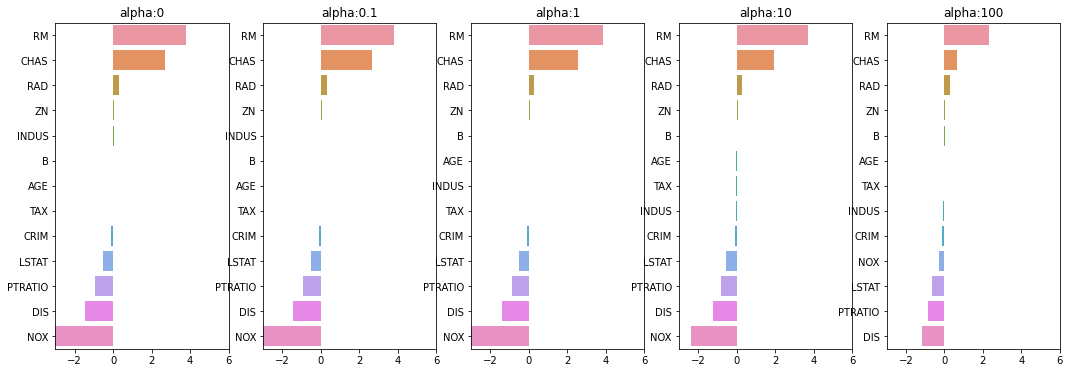

In [5]:
# 각 alpha에 따른 회귀계수값을 시각화하기 위해 5개의 열로 된 맷플랏립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀계수값을 데이터로 저장히기 위한 DF생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀계수값 시각화 및 데이터 저장. pos는 axis의 위치지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  # alpha에 따른 피처별로 회귀계수를 Series로 변환하고 이를 DF의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname='alpha:'+str(alpha)
  coeff_df[colname] = coeff
  # 막대그래프로 각alpha값에서의 회귀계수를 시각화. 회귀계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  import seaborn as sns
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀계수를 DF으로 표시
plt.show()

* alpha 값을 계속 증가시킬수록 회귀계수값은 지속적으로 작아짐을 알 수 있다.
* 특히 NOX 피처의 경우, alpha값을 계속 증가시킴에 따라 회귀계수가 크기 작아진다.

In [6]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+ str(ridge_alphas[0]) #''안에 공백넣으면 오류뜸
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


* 릿지회귀는 회귀계수를 0으로 만들지는 않는다.

## 3. 라쏘 회귀

* 라쏘회귀는 W의 절댓값에 페널티를 부여하는 L1규제를 선형회귀에 적용한것임
* 피처선택의 특성 : L2규제(릿지)의 경우 회귀계수의 크기를 감소시키는데 반해, L1규제(라쏘)는 불필요한 회귀계수를 0으로 만들고 제거

* 라쏘회귀의 주요생성 파라미터 alpha는 L1 규제계수에 해당함.


In [7]:
## 릿지회귀 예제코드와 유사하게, 라쏘의 alpha값을 변화시키면서 RMSE와 각 피처의 회귀계수를 출력
## 릿지회귀 예제코드를 한번에 수행하는 함수 정의

from sklearn.linear_model import Lasso, ElasticNet
# alpha값에 따른 회귀모델의 폴드평균 RMSE를 출력하고 회귀게수값을 DF으로 반환
# 라쏘회귀, 엘라스틱넷 회귀 모두 수행가능
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df=pd.DataFrame()

  if verbose : print('#####', model_name, '#####')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha{0}일때, 5폴드세트의 평균RMSE: {1:.3f}'.format(param, avg_rmse))
    #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀계수추출
    model.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀게수를 Seriese로 변환하고 이를DF칼럼으로 추가
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname='alpha:'+str(param)
    coeff_df[colname]=coeff
  return coeff_df

In [8]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고, get_linear_reg_eval()함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

##### Lasso #####
alpha0.07일때, 5폴드세트의 평균RMSE: 5.612
alpha0.1일때, 5폴드세트의 평균RMSE: 5.615
alpha0.5일때, 5폴드세트의 평균RMSE: 5.669
alpha1일때, 5폴드세트의 평균RMSE: 5.776
alpha3일때, 5폴드세트의 평균RMSE: 6.189


* alpha가 0.07일때 rmse가 가장 낮아 가장 좋은 값이다.

In [10]:
# 반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해, 회귀계수 DF출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


* alpha의 크기가 증가함에 따라 일부피처의 회귀게수는 아예0으로 바뀌고 있다. 
* NOX속성은 alpha가 0.07일때부터 회귀계수가0임. 
* 회귀계수가 0인 피처는 회귀식에서 제외되면서 피처선택의 효과를 얻는다.


## 4. 엘라스틱넷 회귀

* 엘라스틱넷 회귀는 L1규제와 L2규제를 결합한 회귀이다. 
* 엘라스틱넷 회귀는, 라쏘회귀의 피처선택기능을 완화하기 위해 라쏘회귀에 L2규제를 추가한 것이다.
* 단점은 L1과 L2가 결합된 것이므로 수행시간이 상대적으로 오래 걸린다는 것이다. 
 

* 엘라스틱넷의 주요 생성 파라미터는 alpha와 l1_ratio    
  a = L1규제의 alpha    
  b = L2규제의 alpha     
  엘라스틱넷의 alpha = a+b   
  엘라스틱넷의 l1_ratio = a/(a+b)

In [11]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

##### ElasticNet #####
alpha0.07일때, 5폴드세트의 평균RMSE: 5.503
alpha0.1일때, 5폴드세트의 평균RMSE: 5.478
alpha0.5일때, 5폴드세트의 평균RMSE: 5.413
alpha1일때, 5폴드세트의 평균RMSE: 5.522
alpha3일때, 5폴드세트의 평균RMSE: 5.954


* alpha가 0.5일때 가장 낮은 rmse로 가장 좋다.

In [13]:
# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수DF 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.445833,3.252662,1.723610,0.933936,0.000000
CHAS,1.287475,0.987970,0.000000,0.000000,0.000000
RAD,0.284007,0.288726,0.311583,0.301569,0.199147
ZN,0.050678,0.051377,0.054045,0.053240,0.046018
B,0.010035,0.009963,0.008997,0.008339,0.007271
AGE,-0.008997,-0.007219,0.009475,0.020579,0.038926
TAX,-0.014636,-0.014952,-0.016300,-0.016439,-0.013587
INDUS,-0.045733,-0.045901,-0.031702,-0.012657,-0.000000
CRIM,-0.100331,-0.100079,-0.092503,-0.080371,-0.040903
NOX,-0.484864,-0.059533,-0.000000,-0.000000,-0.000000


* alpha 0.5일때 RMSE가 가장 낮아 가장 좋은 예측성능을 보인다. 
* alpha값에 따른 피처들의 회귀계수들의 값이 라쏘보다는 상대적으로 0이 되는 값이 적다.


## 5. 선형 회귀 모델을 위한 데이터 변환

* 피처/타겟 데이터셋의 분포도가 심하게 왜곡됐을 경우, 예측성능에 부정적 영향 미칠가능성이 있음.
* 선형회귀모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행해야함.
  * 피처 데이터셋에 적용하는 변환 작업   
    1. StandardScaler / MinMaxScaler        
    2. 위를 수행한 데이터셋에 다시 다항특성을 적용해 변환. 1번방법으로 성능향상이 없을 경우.    
    3. 로그변환. 로그변환이 가장 많이 사용되는 변환방법. [1+log()] 를 적용하면 정규분포에 가까운 형태로 변환됨.
  * 타겟 데이터셋에 적용하는 변환 작업
    1. 일반적으로 로그변환을 적용


In [19]:
# method는 표준 정규분포 변환(Standard), 최대최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.

from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method=='MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method=='Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data=input_data
  
  if p_degree !=None:
    scaled_data=PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
  
  return scaled_data


In [20]:
# Ridge의 alpha값을 다르게 적용하고, 다양한 데이터 변환방법에 따른 RMSE 추출
alphas = [0.1,1,10,100]

# 5개의 방식으로 변환
# 0.원본그대로/ 1.표준정규분포/ 2.표준정규+다항식특성/ 3.최대최소 정규화/ 4.최대최소정규화+다항식특성/ 5.로그변환
scale_methods = [(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]
for scale_method in scale_methods :
  X_data_scaled = get_scaled_data(method = scale_method[0],p_degree = scale_method[1],input_data = X_data)
  print('\n##변환 유형 : {0}, Polynomial Degree : {1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge',params = alphas, X_data_n = X_data_scaled, y_target_n = y_target,verbose = False)


##변환 유형 : None, Polynomial Degree : None
alpha0.1일때, 5폴드세트의 평균RMSE: 5.788
alpha1일때, 5폴드세트의 평균RMSE: 5.653
alpha10일때, 5폴드세트의 평균RMSE: 5.518
alpha100일때, 5폴드세트의 평균RMSE: 5.330

##변환 유형 : Standard, Polynomial Degree : None
alpha0.1일때, 5폴드세트의 평균RMSE: 5.826
alpha1일때, 5폴드세트의 평균RMSE: 5.803
alpha10일때, 5폴드세트의 평균RMSE: 5.637
alpha100일때, 5폴드세트의 평균RMSE: 5.421

##변환 유형 : Standard, Polynomial Degree : 2
alpha0.1일때, 5폴드세트의 평균RMSE: 8.827
alpha1일때, 5폴드세트의 평균RMSE: 6.871
alpha10일때, 5폴드세트의 평균RMSE: 5.485
alpha100일때, 5폴드세트의 평균RMSE: 4.634

##변환 유형 : MinMax, Polynomial Degree : None
alpha0.1일때, 5폴드세트의 평균RMSE: 5.764
alpha1일때, 5폴드세트의 평균RMSE: 5.465
alpha10일때, 5폴드세트의 평균RMSE: 5.754
alpha100일때, 5폴드세트의 평균RMSE: 7.635

##변환 유형 : MinMax, Polynomial Degree : 2
alpha0.1일때, 5폴드세트의 평균RMSE: 5.298
alpha1일때, 5폴드세트의 평균RMSE: 4.323
alpha10일때, 5폴드세트의 평균RMSE: 5.185
alpha100일때, 5폴드세트의 평균RMSE: 6.538

##변환 유형 : Log, Polynomial Degree : None
alpha0.1일때, 5폴드세트의 평균RMSE: 4.770
alpha1일때, 5폴드세트의 평균RMSE: 4.676
alpha10일때, 5폴드세트의 평균RMSE: 4.836
al

* 0.원본그대로 일때와 비교하여    
 1.표준정규분포/ 2.표준정규+다항식특성/ 3.최대최소 정규화/ 4.최대최소정규화+다항식특성/ 5.로그변환     
 했을 때 rmse가 작아졌는지, 성능이 개선되었는지 확인해본다. 


# 07 로지스틱 회귀

* 로지스틱 회귀는 선형회귀 계열이다.    
  (회귀가 선형/비선형인지는 독립변수가 아닌 가중치 변수가 선형인지 아닌지 따른다.)
* 로지스틱 회귀는 선형함수의 회귀최적선을 찾는 것이 아니라, 시그모이드 함수 최적선을 찾고 이 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정한다는 것이다. 
 

In [21]:
## 분류문제에 적용
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로, 평균이 0 분산이 1인 데이터분포로 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습/예측
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy : {0:.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc : {0:.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy : 0.977
roc_auc : 0.972


* 사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터
  1. penalty : 규제유형을 설정. l2가 디폴트.     
  2. C : 규제강도를 조절하는 alpha값의 역수. C가 클수록 규제강도가 작다.  

In [27]:
from sklearn.model_selection import GridSearchCV
params = {'penalty': ['l2', 'l1'],
          'C': [0.01, 0.1, 1, 5, 10]}
grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_,
                                                     grid_clf.best_score_))

최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 :0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

* 로지스틱 회귀는 가볍고 빠르며, 이진분류 예측성능도 뛰어나다.
* 따라서 로지스틱 회귀를 이진분류의 기본모델로 사용하는 경우가 많다. 
* 로지스틱 회귀는 희소한 데이터 세트 분류에도 뛰어난 성ㄴ으을 보여서 텍스트 분류에서도 자주 사용된다. 
* '회귀'계열이지만 '분류'에 쓰인다!!!

# 08 회귀 트리

* 회귀함수를 기반으로 하지 않고, 결정트리와 같은 트리를 기반으로 하는 회귀 방식
* 트리 기반의 회귀는, '회귀 트리'를 생성하고 이를 기반으로 회귀예측을 함.
* 분류트리와 크게 다를 것은 없지만, 분류트리가 특정 클래스 레이블을 결정하는 것과 달리,    
  회귀트리는 리프노드에 속한 데이터값의 평균을 구해 회귀예측값을 계산한다.

In [ ]:
# p.336